# Machine Learning :  Problem 5
## Non-Linear regression

## Disclaimer
These exercises are based on the Stanford Machine Learning Course [CS229](http://cs229.stanford.edu) of Andrew Ng. The environment of the exercise have been tuned to the theory content taught at Ravensburg Weingarten University.

We are using the Python programming language. If you don't know Python or if you would like to refresh your memory, take a look at the [Python tutorial](http://docs.python.org/tut/).
We will mostly work with NumPy, the fundamental package for scientific computing in Python. Please read the [NumPy quickstart tutorial](https://numpy.org/devdocs/user/quickstart.html). In addition, the documention of MatPlotLib and Scipy lib can be found here: .[MatplotLib](https://matplotlib.org/). [Scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/).

In this problem we will expand our knowledge of Linear regression to Non-Linear Regression. The intitial part of the problem remain similar where user has to extract the data from given file and segregate it into 2 variables. User can also plot these recovered points (just as did in Problem 1) and see that a straight line would not be the best possible fit for given dataset. Therefore we resort to Non-Linear Regression.

### Basics of NLR

Instead of creating new input features $ x_i'$ from old ones $ x_i $ (which we did in LR by adding a column of 1s to every element of input datapoint), it is common to use a feature
function which maps from $ x_i$ to $ x_i'$. For eg, the feature vector for NLR of degree 2 looks like below:

$$
\phi = \left(\begin{array}{cc} 
x_i ²\\
x_i \\
1
\end{array}\right)
$$

The objective of gradient descent remain the same which is to minimize the squared loss defined by equation below:

$$
J(w) = \frac{1}{m}\sum_{i=1}^m \big( h_w(x^{(i)}) - y^{(i)}\big)^2
$$

where the hypthesis function $h_w(x)$ is given by the linear model

$$
h_w(x) = w^T\phi = w_0 + w_1 x + w_2 x^2 + ....
$$

### 1.A Second Degree NLR

In [1]:
# Dependencies imported

# For vector computations and notations
import numpy as np 

# For Plotting
import matplotlib.pyplot as plt

# Defining Solving Parameters

alpha = 1 * 10 ** -1
acc = 10 ** -5

degree = 2

The data is stored in a .csv file which can be read in a similar way as seen in Problem 1. User can use this set of datapoints to generate a linear regression line but that would not be the best fit. This part of the problem is not shown here but can be easily reproduced. Similarly, plotting in this Notebook is also done in Matplotlib library of Python, documentation can be found here: https://matplotlib.org/

In [2]:
############################
##       Read Data        ##
############################

# file in the same directory
data = np.genfromtxt('./nl_data.csv', delimiter=',' )

# Initiate a Empty Input feature
x_data = np.array([])

# Fill values from read-data
for each in data:
    x_data = np.append(x_data , [each[0]])

# Initiate a Empty Output feature
y_data = np.array([])

for each in data:
    y_data = np.append(y_data , [each[1]])

# Size of data
m = y_data.size

print('Size of dataset is {} points'.format(m))



Size of dataset is 71 points


Text(0.5,0,'Height (in cms)')

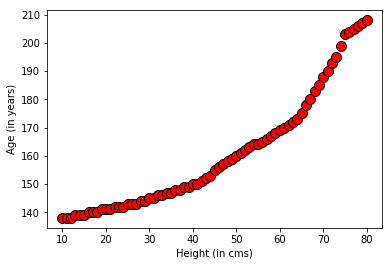

In [3]:

############################
##    Visualize Data      ##
############################

plt.figure()
plt.plot(x_data , y_data ,'ro', ms=10, mec='k')
plt.ylabel('Age (in years)')
plt.xlabel('Height (in cms)')

### Normalizing Data

In the whole scope of Machine Learning, we deal with variable of different scalings. For example, X variable ranges in 10^4 whereas Y variable ranges from just 1 to 10. In this case, X variable will have a much larger weight in the calculations which will be dominated by X. This my very often results in erroneous prediction if not utterly false values. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability. There are many methods to Normalize the data out of which we choose the following: 

$$
x''^{(i)} = \frac{x^{(i)} - min(X)}{max(X) - min(X)} 
$$

where $min(X)$ = minimum value in the whole set of Input Variable
and   $max(X)$ = minimum value in the whole set of Input Variable.

Similar transformation technique is applied to Output Variable(Y).


In [4]:
############################
##    Noramalize data     ##
############################

# Finding the max and min to normalize the data.
max_x = max(x_data)
min_x = min(x_data)
max_y = max(y_data)
min_y = min(y_data)

# Each data point in X and Y are normalized as follows
# New_x = (Old_x - Min_x) / (Max_x - Min_x) 

for f in range(m):
    x_data[f] = (x_data[f] - min_x) / (max_x - min_x)

for h in range(m):
    y_data[h] = (y_data[h] - min_y) / (max_y - min_y)


Further, we will define the following functions:
1. Producing a feature function (\phi) from given input point.
2. Produce a hypothesis value (which is dot product of \phi and weight vector)
3. Function to compute the gradient (as denoted in equation above)

### Feature Function

In [5]:
############################
##    Feature Function    ##
############################

def feature(x):
    global degree
    # produces a feature vector with given inputs 

    phi_temp = np.array([])
    
    # depending on degree, make a feauture vector with powers of input x
    for p in range(degree + 1):
        phi_temp = np.append(phi_temp, [x ** p]) # storing in an array

    return phi_temp

### Hypothesis

In [6]:
############################
##    Hypothesis Func     ##
############################

def hypo(ix,w):
    # function for dot product
    h = np.dot(ix,w)

    return h

### Gradient Computation

In [7]:
############################
##   Gradient Function    ##
##  (Sqaured Loss Func)   ##
############################

def sq_gradient(x,w,y):
    
    # Valid for sqaure loss only
    # See analytical solution
    
    sq_grad = feature(x)*(hypo(feature(x), w) - y) 
    
    return sq_grad


### Implementing gradient descent

Now that we have the hypothesis and the square loss function we can implement the gradient descent routine. First, write a function $\nabla J(w)$ which returns the gradient of the sqaure loss function. The gradient is just a vector with all the partial derivatives

$$
\nabla J(w) = \bigg[\frac{\partial J(w)}{\partial w_1} , \dotsc, \frac{\partial J(w)}{\partial w_d} \bigg]^T
$$
where
$$
\frac{\partial J(w)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^m \big( h_w(x^{(i)}) - y^{(i)}\big) x_j^{(i)}
$$


Once all the functions are defined then the job is pretty straight forward as seen in Problem 1. The gradient descent function can be written with weight changes after each iteration. Implement gradient descent in the function `gradient_descent(x,y,w,acc,alpha)`.
Recall the update rule of gradient descent which is
$$
w^{(k+1)} = w^{(k)} - \alpha \nabla J(w^{(k)})
$$


In [8]:
############################
##    Gradient Descent    ##
############################

def gradient_decent(x,y,w,acc):
    global itr, m

    delta_w = np.ones(degree + 1) # initialized randomly

    itr = 0
    while all(acc < abs(a) for a in delta_w):
        
        sq_g = 0

        # Compute Cumulative gradient
        for a in range(m):

            # Gradient computation is Normalized by number of data points available
            sq_g = sq_g + sq_gradient(x[a],w,y[a])/m
            a = a+1
       
        delta_w = alpha * sq_g 
        
        # alpha is learning rate
        w = w - (delta_w)
        
        itr = itr+1
    
    return w, itr

# Call function to solve

weight = np.zeros(degree+1)

sq_weight, sq_itr = gradient_decent(x_data, y_data, weight, acc)
print('The optimized weight vector is {}.'.format(sq_weight))
print('Solving criteria with Sq Loss Func: Convergency = {} and Learining Rate = {}'.format(acc,alpha))
print('Total iterations done = {}'.format(sq_itr))


The optimized weight vector is [-0.05699084  0.41293153  0.53306576].
Solving criteria with Sq Loss Func: Convergency = 1e-05 and Learining Rate = 0.1
Total iterations done = 243


The algorithm will run its course and after each iteration the weight vector will be modified to get a lower Gradient of the Sqaured Loss function. Finally the weight vector is converged. To plot the learned vector as a curve we have to compute the Output value from the hypothesis function and the same is plotted along with the Input data points. Note that we sort the Input Variables to get a continuous graph of Predicted Outputs.

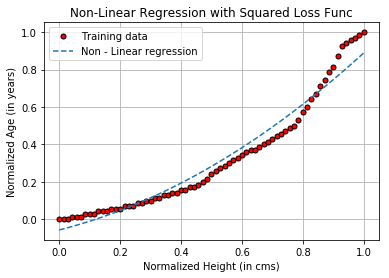

In [9]:
############################
##  Plot Regression Line  ##
############################

# sorting to get a continuous polynomial output
x_data.sort()

# Compute Output based on Learned Weight vector
new_y = np.array([])
for every in x_data:
    new_y = np.append(new_y, [hypo(feature(every), sq_weight)]) 

#Plot in the same graph
plt.plot(x_data , y_data ,'ro', ms=5, mec='k')
plt.plot(x_data, new_y, '--')
plt.grid(b=None, which='major', axis='both')
plt.title('Non-Linear Regression with Squared Loss Func')
plt.legend(['Training data', 'Non - Linear regression'])
plt.ylabel('Normalized Age (in years)')
plt.xlabel('Normalized Height (in cms)')
plt.show()


### 1.B Observe higher order NLR

Here we need to simultaneously solve for non-linear regression of different degrees. As the degree of the model increase the regression tries to pass as many points from the training data and Sqaured Error is minimized. So extend our solution of Part A, we just keep $degree$ as a input to the function. Accordingly, $Feature Function$ and $Gradient Function$ is changed.  

In [10]:
############################
##    Feature Function    ##
############################

def feature(x,degree):
    
    # produces a feature vector with given inputs 

    phi_temp = np.array([])
    
    # depending on degree, make a feauture vector with powers of input x
    for p in range(degree + 1):
        phi_temp = np.append(phi_temp, [x ** p]) # storing in an array

    return phi_temp

############################
##   Gradient Function    ##
##  (Sqaured Loss Func)   ##
############################

def sq_gradient(x,w,y,degree):
    
    # Valid for sqaure loss only
    # See analytical solution
    
    sq_grad = feature(x,degree)*(hypo(feature(x,degree), w) - y) 
    
    return sq_grad

############################
##    Gradient Descent    ##
############################

def gradient_decent(x,y,w,acc,degree):
    global itr, m

    delta_w = np.ones(degree + 1) # initialized randomly

    itr = 0
    while all(acc < abs(a) for a in delta_w):
        
        sq_g = 0

        # Compute Cumulative gradient
        for a in range(m):

            # Gradient computation is Normalized by number of data points available
            sq_g = sq_g + sq_gradient(x[a], w, y[a], degree)/m
            a = a+1
       
        delta_w = alpha * sq_g 
        
        # alpha is learning rate
        w = w - (delta_w)
        
        itr = itr+1
    
    return w, itr

The solution is done in batch, where all degrees for which regression model is required are stored in a list and thereby iteratively solved. Eg: In our case we solve of for 5 different values.

$$
degree = [ 3, 4, 6, 7, 8 ]
$$

Correspond to each value of degree, we will get a Weight Vector and Number of Iterations it took for convergence.

In [11]:
############################
##     Bunch Solving      ##
############################

alpha = 1 * 10 ** -1
acc = 10 ** -8

degree = [ 3, 4, 6, 7, 8 ]

sq_weight = [0] * len(degree)
sq_itr = [0] * len(degree)

print('Solving.............')
for b in range(len(degree)):

    weight = np.zeros(degree[b] + 1)

    sq_weight[b], sq_itr[b] = gradient_decent(x_data, y_data, weight, acc, degree[b])


print('The weight vectors are optimized for each degree specification.')

# Uncomment the next line to print weight vector of a specific degree. Carefull with indexing.
#print('The optimized weight vector is {}.'.format(sq_weight[i]))

print('Solving criteria with Sq Loss Func: Convergency = {} and Learining Rate = {}'.format(acc,alpha))
print('Total iterations done = {}. (In same order as degree specification)'.format(sq_itr))


Solving.............
The weight vectors are optimized for each degree specification.
Solving criteria with Sq Loss Func: Convergency = 1e-08 and Learining Rate = 0.1
Total iterations done = [1376, 2125, 1836, 1076, 638]. (In same order as degree specification)


### Plotting

While plotting also, we take the Solutions of Weight Vector one by one and compute the Predicted Output based on the respective model of that degree. Note that we sort the Input Variables to get a continuous graph of Predicted Outputs.

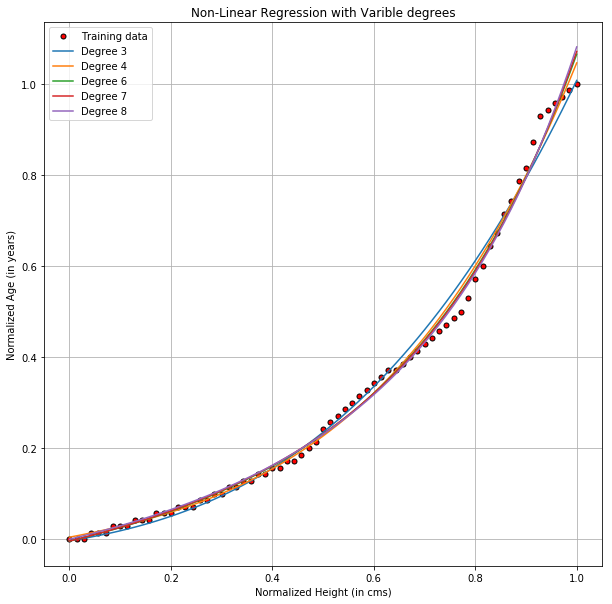

In [12]:
############################
##  Plot Regression Line  ##
############################

# sorting to get a continuous polynomial output
x_data.sort()

# Compute Output based on Learned Weight vector
new_y = [np.array([])]*len(degree)

for k in range(len(degree)):

    # for each degree
    for every in x_data:
        new_y[k] = np.append(new_y[k], [hypo(feature(every,degree[k]), sq_weight[k])]) 

# Resize for better view
plt.figure(figsize=(10,10))
plt.plot(x_data , y_data ,'ro', ms=5, mec='k')        

for v in range(len(degree)):
    # Plot for each degree
    plt.plot(x_data, new_y[v])


plt.legend(['Training data', 'Degree 3', 'Degree 4', 'Degree 6', 'Degree 7', 'Degree 8'])
plt.grid(b=None, which='major', axis='both')
plt.title('Non-Linear Regression with Varible degrees')
plt.ylabel('Normalized Age (in years)')
plt.xlabel('Normalized Height (in cms)')
plt.show()

### 1.C Cross Validation

In Part B, we learned that as model degree is increased in tries to fit each datapoint with more accuracy. But this comes at a cost. Generally, till a certain complexity it is benefecial, but after that the model starts to Overfit. This means that the regression model is trained for the given set of data points. It may produce error less outputs for the known points but it doesn't behave very well to unknown and unseen new data. In this part we divide the given dataset into 2 parts: Training Data and Testing Data. Different model of varying complexity are trained with the Training Dataset and their efficiency is evaluated by computing the error they produce when encountered by Test Datapoints. This method is often termed as 'Cross Validation'. We use a python library SCIKIT LEARN (https://scikit-learn.org/stable/index.html) to divide datapoints into 2 groups.

In [13]:
from sklearn import model_selection

############################
##       Read Data        ##
############################

train_data , test_data = model_selection.train_test_split(data)

The model is trained on just the Training datapoints.

In [14]:
# Initiate a Empty Input feature
nx_data = np.array([])

# Fill values from read-data
for each in train_data:
    nx_data = np.append(nx_data , [each[0]])

# Initiate a Empty Output feature
ny_data = np.array([])

for each in train_data:
    ny_data = np.append(ny_data , [each[1]])

# Size of data
m = ny_data.size

print('Size of training dataset is {}'.format(m))


Size of training dataset is 53


In [15]:
############################
##    Noramalize data     ##
############################

# Finding the max and min to normalize the data.
max_x = max(nx_data)
min_x = min(nx_data)
max_y = max(ny_data)
min_y = min(ny_data)


# Each data point in X and Y are normalized as follows
# New_x = (Old_x - Min_x) / (Max_x - Min_x) 

for f in range(m):
    nx_data[f] = (nx_data[f] - min_x) / (max_x - min_x)
    ny_data[f] = (ny_data[f] - min_y) / (max_y - min_y)


Just as done in part B, we solve for a bunch of possibilities. The solving function is exactly the same and can be easily reproduced.

$$
degree = [ 3,4,6,7,8 ]
$$

In [16]:
print('Solving.............')
weight = [0] * len(degree)

for c in range(len(degree)):

    weight[c] = np.zeros(degree[c] + 1)

    sq_weight[c], sq_itr[c] = gradient_decent(nx_data, ny_data, weight[c], acc, degree[c])

    
print('Solved.')

Solving.............
Solved.


### Evaluation of Models

To evaluate the model on the Test Datapoints, we make Input and Outputs arrays. Normalizing on these points is done similar as done above.


In [17]:
############################
##        Test data       ##
############################

# Initiate a Empty Input feature
tx_data = np.array([])

# Fill values from read-data
for each in test_data:
    tx_data = np.append(tx_data , [each[0]])

# Initiate a Empty Output feature
ty_data = np.array([])

for each in test_data:
    ty_data = np.append(ty_data , [each[1]])

# Normalize Test data with concept as applied in Training Data
max_tx = max(tx_data)
min_tx = min(tx_data)
max_ty = max(ty_data)
min_ty = min(ty_data)

for f in range(len(ty_data)):
    tx_data[f] = (tx_data[f] - min_tx) / (max_tx - min_tx)

for h in range(len(ty_data)):
    ty_data[h] = (ty_data[h] - min_ty) / (max_ty - min_ty)



We next write a function to compute the error between Hypothesis Value and Actual Output Value

$$
Mean Error = \frac{1}{p}\sum_{i=1}^p \big( h_w(x^{(i)}) - y^{(i)}\big)^2
$$

where $p$ is the count of Test Datapoints.

In [18]:
############################
##      Error function    ##
############################

def errors(y,yp):
    # Computes the mean error between Actual Output Value vs the Predicted Value
    total_error = 0

    for r in range(len(y)):
        total_error = total_error + ( ( y[r] - yp[r] ) ** 2 )

    mean_err = total_error / (len(y))

    return mean_err


### Plot Error Curve

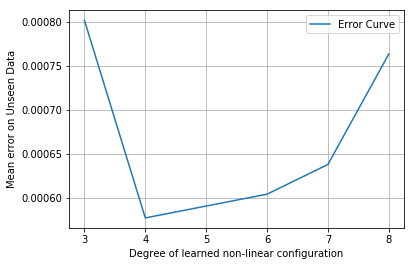

In [19]:
############################
##    Plot Error Curve    ##
############################

# Compute Output based on Learned Weight vector
new_ty = [np.array([])]*len(degree)

for k in range(len(degree)):
    # for each degree
    for every in tx_data:
        new_ty[k] = np.append(new_ty[k], [hypo(feature(every,degree[k]), sq_weight[k])]) 

mean_err = [np.array([])]*len(degree)

for u in range(len(degree)):
    mean_err[u] = errors(ty_data, new_ty[u])

plt.plot(degree,mean_err)

plt.xlabel('Degree of learned non-linear configuration')
plt.ylabel('Mean error on Unseen Data')
plt.grid(b=None, which='major', axis='both')
plt.legend(['Error Curve'])
plt.xticks(np.linspace(min(degree),max(degree),len(degree)+1))
plt.show()


## What can you further contribute to this Notebook ?

Maybe try a different stopping criteria for Gradient Descent where you rather keep a check on the cost function. Stop the iterations when cost saturates at a point.